# Topic Modeling: Creating Time Series Visualizations

A lesson from [Melanie Walsh's *Introduction to Cultural Analytics*](https://github.com/melaniewalsh/Intro-Cultural-Analytics/blob/master/book/Text-Analysis/Topic-Modeling-Time-Series.ipynb)

Last week we learned about "topic modeling", using MALLET.

In this particular lesson, we’re going to use Little MALLET Wrapper, a Python wrapper for MALLET, to topic model a CSV file of Donald Trump’s tweets and plot the fluctuation of topics over time.

### Set MALLET Path

Since Little MALLET Wrapper is a Python package built around MALLET, we first need to tell it where the bigger, Java-based MALLET lives.

We’re going to make a variable called path_to_mallet and assign it the file path of our MALLET program. We need to point it, specifically, to the “mallet” file inside the “bin” folder inside the “mallet-2.0.8” folder.

In [130]:
path_to_mallet = '../_week9/mallet-2.0.8/bin/mallet'

### Install Packages

In [131]:
#!pip install little_mallet_wrapper
#!pip install seaborn

### Import Packages

Now let’s import the little_mallet_wrapper and the data viz library seaborn.

In [132]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

### Get Training Data From CSV File

Before we topic model Donald Trump’s tweets, we need to process the tweets and prepare them for analysis. The steps below demonstrate how to process texts if they come from a CSV file.

Note: We’re calling these text files our training data, because we’re training our topic model with these texts. The topic model will be learning and extracting topics based on these texts

## Trump Tweets

This dataset of Donald Trump’s tweets is taken from Trump Twitter Archive. To read in the CSV file, we’re going to use Pandas.

In [133]:
trump_df = pd.read_csv("../_datasets/texts/politics/Trump-Tweets.csv", encoding='utf-8')

In [134]:
trump_df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Just finished a very good conversation with President Xi of China. Discussed in great detail the...,03-27-2020 05:19:02,33074,202087,False,1243407157321560000
1,Twitter for iPhone,Will be interviewed on @seanhannity at 9:10 P.M. @FoxNews,03-27-2020 01:05:59,7419,42186,False,1243343475799720000
2,Twitter for iPhone,The world is at war with a hidden enemy. WE WILL WIN! https://t.co/QLceNWcL6Z,03-26-2020 23:50:02,24472,97346,False,1243324360523490000
3,Twitter for iPhone,Our great Oil &amp; Gas industry is under under seige after having one of the best years in reco...,03-26-2020 23:06:28,25514,131210,False,1243313399284500000
4,Twitter for iPhone,Will be going out in 10 minutes for the press conference.,03-26-2020 20:57:15,15797,130201,False,1243280878991790000


In [135]:
trump_df['text'] = trump_df['text'].astype(str)


## Process Trump Tweets

In [136]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in trump_df['text']]

### Get Original Trump Tweets

In [137]:
original_trump_tweets = [title for title in trump_df['text']]

In [138]:
## Get Dataset Statistics

In [139]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 29395
Mean Number of Words per Document: 12.8
Vocabulary Size: 34294


## Training the Topic Model

We’re going to train our topic model with the little_mallet_wrapper.train_topic_model() function.

So we have to set a few things up first.

## Set Number of Topics

In [140]:
num_topics = 35

## Set Training Data

In [141]:
training_data = training_data

## Set Other MALLET File Paths

In [142]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/Trump-Tweets'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"


## Import Data

We’re going to import the data with little_mallet_wrapper.import_data().

In [143]:
little_mallet_wrapper.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


## Train Topic Model
The topic model should take 1-2 minutes to complete

In [144]:
little_mallet_wrapper.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      num_topics)

Training topic model...
Complete


## Display Topics and Top Words

In [145]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['false', 'http', 'twitter', 'client', 'web', 'cont', 'china', 'barackobama', 'oil', 'gas', 'obama', 'beta', 'twitlonger', 'budget', 'energy', 'need', 'debt', 'opec', 'government', 'saudi']

✨Topic 1✨

['think', 'big', 'deal', 'entrepreneurs', 'like', 'keep', 'work', 'never', 'success', 'focus', 'always', 'know', 'way', 'give', 'business', 'art', 'make', 'best', 'one', 'learn']

✨Topic 2✨

['great', 'big', 'people', 'forward', 'carolina', 'crowd', 'looking', 'see', 'night', 'speech', 'soon', 'south', 'look', 'tomorrow', 'amazing', 'day', 'last', 'going', 'rally', 'north']

✨Topic 3✨

['great', 'vote', 'state', 'strong', 'endorsement', 'governor', 'military', 'job', 'total', 'vets', 'get', 'crime', 'senator', 'big', 'win', 'complete', 'john', 'loves', 'amendment', 'done']

✨Topic 4✨

['obama', 'iran', 'isis', 'attack', 'president', 'syria', 'israel', 'iraq', 'world', 'war', 'nuclear', 'administration', 'turkey', 'radical', 'russia', 'must', 'leader', 'deal', 'terrorist', 'tim

## Display Top Tweets Per Topic
### Load Topic Distributions
To load topic distributions, run the following four cells

In [146]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [147]:
tweet_dict = dict(zip(training_data, original_trump_tweets))

In [148]:
def display_top_tweets_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), tweet_dict[document] + "\n")
    return

#### Display top tweets in Topic 0

In [149]:
display_top_tweets_per_topic(topic_number=0, number_of_documents=5)

✨Topic 0✨

['false', 'http', 'twitter', 'client', 'web', 'cont', 'china', 'barackobama', 'oil', 'gas', 'obama', 'beta', 'twitlonger', 'budget', 'energy', 'need', 'debt', 'opec', 'government', 'saudi']

0.6762 No surprise welfare spending is up over 30% under Obama. http://t.co/pHREg2Cj  He is the food stamp &amp; welfare "king"

0.6706 I've got news for President @BarackObama: America is not what's wrong with the world. I don't believe we need (cont) http://t.co/DMXg2rEo,02-17-2012 15:10:32,64,8,false,170525543622656000
TwitLonger Beta,Government needs to stop pick-pocketing your wallet. Every time it does it slows growth and kills jobs. It's (cont) http://t.co/OhmFhNJb

0.6555 While @BarackObama watches China is trying to have the yuan overtake our dollar as the international (cont) http://t.co/kN0XJq96

0.6391 When it comes to China @BarackObama practices "pretty please" diplomacy. He begs and pleads and bows---and it… (cont) http://t.co/Iyjm0IGl

0.6264 $5 a gallon gas and we have y

## Plot Topics Over Time


### Load Topic Distributions

In [150]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

### Add Topic Distribution Columns

Add column with all topic distributions for every tweet

In [151]:
trump_df['topic_distributions'] = pd.Series(topic_distributions)

Make a separate dataframe with each topic distribution as a separate column

In [152]:
topic_distributions_df = trump_df['topic_distributions'].apply(pd.Series)

Rename each of those columns with the first four words from the topic

In [153]:
topic_distributions_df.columns = [" ".join(topic[:4]) for topic in topics]

Merge that column into the dataframe

In [154]:
trump_df = pd.concat([trump_df, topic_distributions_df], axis=1)

### Date Formatting For Time Series Plot

#### Convert to datetime

In [155]:
trump_df['date'] = pd.to_datetime(trump_df['created_at'])

#### Extract year

In [156]:
trump_df['year'] = pd.to_datetime(trump_df['date'].dt.year, format='%Y')

#### Extract year and month

In [157]:
trump_df['year-month'] = trump_df['date'].dt.to_period('M')

In [158]:
trump_df['Date (by month)'] = [month.to_timestamp() for month in trump_df['year-month']]

#### Set year and month as Pandas Index

In [159]:
trump_df = trump_df.set_index('Date (by month)')

### Plot Individual Topics as Time Series

**Topic 10 Label**:

(Double-click this cell to enter your own label)

### For every Trump tweet, plot the probability of Topic 10:

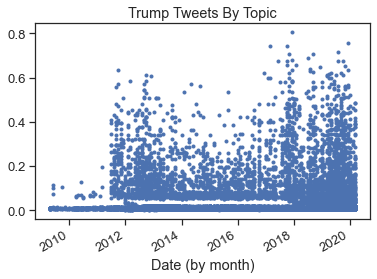

In [160]:
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

trump_df[topic_label].plot(style='.', title='Trump Tweets By Topic')

### Compare to the total number of Trump tweets per month in our set

Text(0.5, 0, 'Date (by Month)')

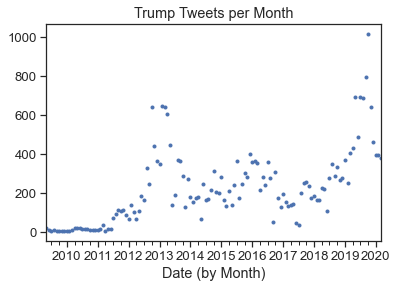

In [161]:
ax= trump_df['year-month'].value_counts().plot(style='.', title='Trump Tweets per Month')
ax.set_xlabel("Date (by Month)")

## 💡 CHECK-IN
> What might this mean for how we interpret the distribution of topic 10 in our corpus?   
> How might this graph of the total Trump tweets change how we interpret the distribution of topic 10 in our corpus?

### For every month of Trump tweets, plot the average probability of Topic 10

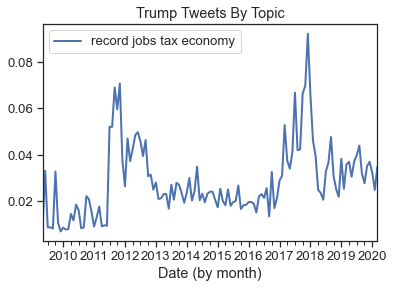

In [162]:
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)

## Your Turn!

Choose 3 different topics from the Trump Twitter Archive and compare them:

In [ ]:
#### Topic #: (Double-Click to change this Cell and 

In [ ]:
## Change the number here to view a different topic
topic_number = 0

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)

In [ ]:
#### Topic #: (Double-Click to change this Cell and 

In [ ]:
## Change the number here to view a different topic
topic_number = 1

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)

In [ ]:
#### Topic #: (Double-Click to change this Cell and 

In [ ]:
## Change the number here to view a different topic
topic_number = 2

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)

## Reflection

1. What sorts of things should a digital humanist be aware of when creating a time-series visualization of topics?
2. What kinds of things can we do to contextualize a time-series data, so that we can better understand the patterns that we're visualizing

Write your reflections below: